## Univariate Time Series Analysis

In [1]:
from IPython.display import display, Markdown
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error
plt.style.use('ggplot')

In [2]:
dic_country = \
{'AUS': 'Australia',
 'BRA': 'Brazil',
 'CAN': 'India',
 'CHN': 'China',
 'GBR': 'United Kingdom',
 'IND': 'India',
 'JPN': 'Japan',
 'SGP': 'Singapore',
 'USA': 'United States'}
pd.DataFrame(dic_country,index=[0]).T.reset_index().rename(columns = {'index': 'country_code', 0: 'country_name'})

,country_code,country_name
0,AUS,Australia
1,BRA,Brazil
2,CAN,India
3,CHN,China
4,GBR,United Kingdom
5,IND,India
6,JPN,Japan
7,SGP,Singapore
8,USA,United States


### Import Data

In [3]:
dic_country = \
{'AUS': 'Australia',
 'BRA': 'Brazil',
 'CAN': 'India',
 'CHN': 'China',
 'GBR': 'United Kingdom',
 'IND': 'India',
 'JPN': 'Japan',
 'SGP': 'Singapore',
 'USA': 'United States'}


datas_m_raw = pd.ExcelFile('Manufacturing_filled.xlsx')
datas_s_raw = pd.ExcelFile('Service_filled.xlsx')
datas_m = {}
datas_s = {}
for con in dic_country.keys():
    datas_m[con] = pd.read_excel(datas_m_raw, sheet_name=con)
    datas_m[con]['Year'] = datas_m[con]['Year'].astype('int')
    datas_s[con] = pd.read_excel(datas_s_raw, sheet_name=con)
    datas_s[con]['Year'] = datas_s[con]['Year'].astype('int')
pd.DataFrame(dic_country,index=[0]).T.reset_index().rename(columns = {'index': 'country_code', 0: 'country_name'})

,country_code,country_name
0,AUS,Australia
1,BRA,Brazil
2,CAN,India
3,CHN,China
4,GBR,United Kingdom
5,IND,India
6,JPN,Japan
7,SGP,Singapore
8,USA,United States


In [5]:
country = list(dic_country.keys())


Since all target variable in our dataset are without missing value. Here for univariate analysis, we will only keep one copy for further analysis.

### Get Target Value

In [125]:
# get target value
manufacture_y = {}
service_y = {}

def get_target_val(df, is_service):
  if not is_service:
    target = df[['Manufacturing_value added_%_of_GDP']]
    target_trim = target[~target['Manufacturing_value added_%_of_GDP'].isna()]
    target_trim = target_trim.set_index(df['Year'])
    return target_trim
  else:
    target = df[['Services_value_added_%_of_GDP']]
    target_trim = target[~target['Services_value_added_%_of_GDP'].isna()]
    target_trim = target_trim.set_index(df['Year'])
    return target_trim
for con in country: 
  manufacture_y[con] = get_target_val(datas_m[con], False)
  service_y[con] = get_target_val(datas_s[con], True)

### Target Value Visualization

#### Manufacture

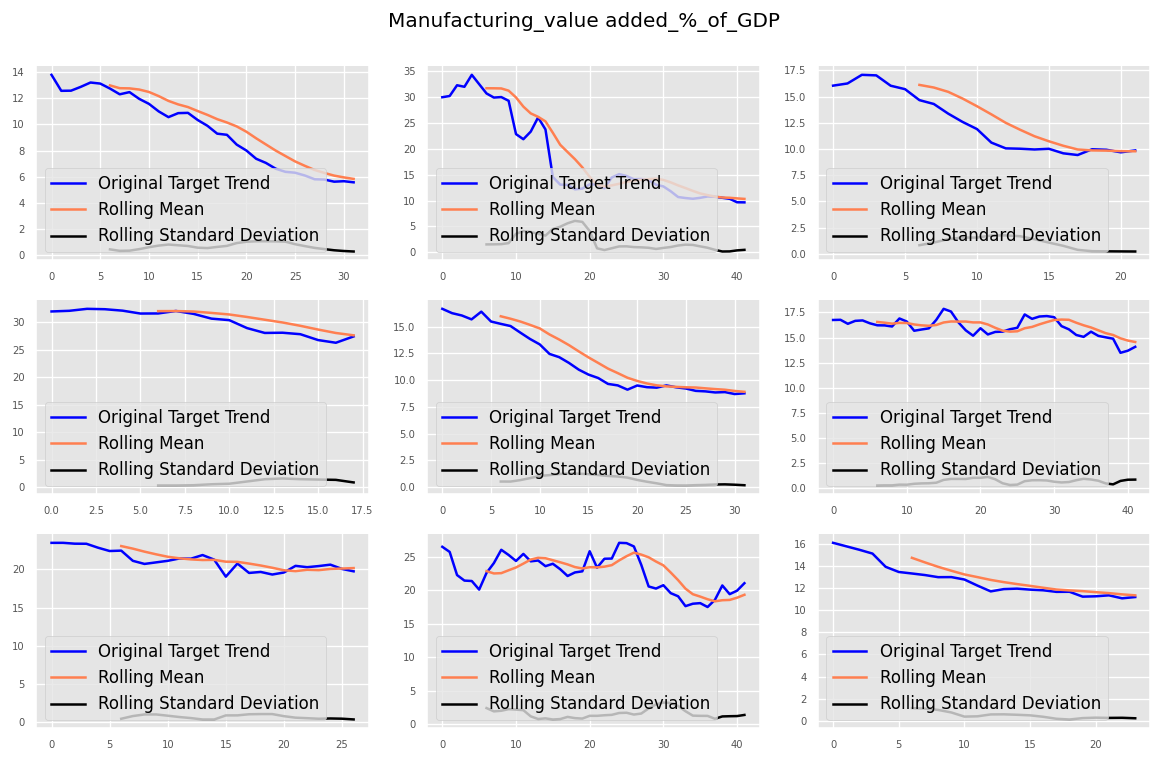

In [8]:
def vis_stationary(df,title,rolling_num = 7):
  fig, axes = plt.subplots(3, 3, dpi=120, figsize=(10,6))
  for i, ax in enumerate(axes.flatten()):
      rolling_mean = df[country[i]].rolling(rolling_num).mean()
      rolling_std = df[country[i]].rolling(rolling_num).std()
      ax.plot(df[country[i]], color="blue",label="Original Target Trend")
      ax.plot(rolling_mean, color="coral", label="Rolling Mean")
      ax.plot(rolling_std, color="black", label = "Rolling Standard Deviation")
      # Decorations
      #ax.seasonal_decompose(df[country],model='additive', period=7)
      ax.xaxis.set_ticks_position('none')
      ax.yaxis.set_ticks_position('none')
      ax.spines["top"].set_alpha(0)
      ax.tick_params(labelsize=6)
      ax.legend(loc="lower left")

  plt.suptitle(title,y=1.05)
  plt.tight_layout()

  plt.show()


vis_stationary(manufacture_y, "Manufacturing_value added_%_of_GDP")

#### Service

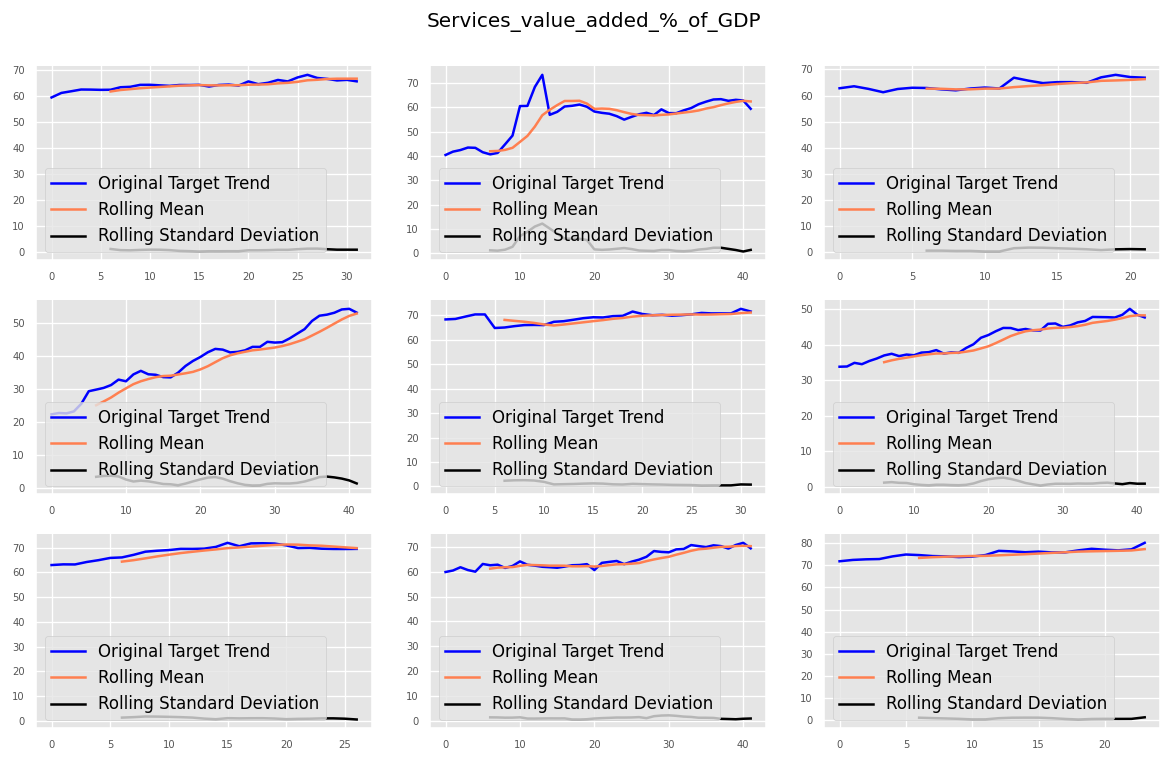

In [9]:
vis_stationary(service_y, "Services_value_added_%_of_GDP")

### Stationarity

#### Visualization Inspection

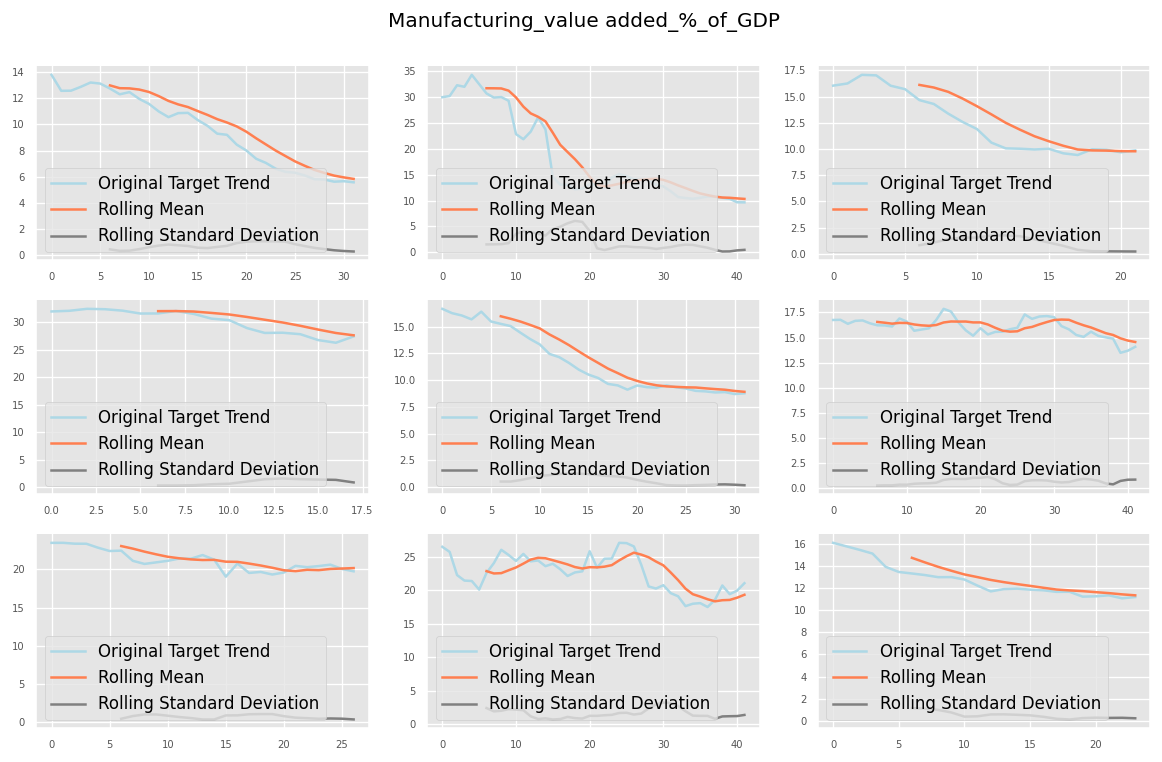

In [10]:
def vis_stationary(df,title,rolling_num = 7):
  fig, axes = plt.subplots(3, 3, dpi=120, figsize=(10,6))
  for i, ax in enumerate(axes.flatten()):
      rolling_mean = df[country[i]].rolling(rolling_num).mean()
      rolling_std = df[country[i]].rolling(rolling_num).std()
      ax.plot(df[country[i]], color="lightblue",label="Original Target Trend")
      ax.plot(rolling_mean, color="coral", label="Rolling Mean")
      ax.plot(rolling_std, color="grey", label = "Rolling Standard Deviation")
      # Decorations
      #ax.seasonal_decompose(df[country],model='additive', period=7)
      ax.xaxis.set_ticks_position('none')
      ax.yaxis.set_ticks_position('none')
      ax.spines["top"].set_alpha(0)
      ax.tick_params(labelsize=6)
      ax.legend(loc="lower left")

  plt.suptitle(title,y=1.05)
  plt.tight_layout()

  plt.show()


vis_stationary(manufacture_y, "Manufacturing_value added_%_of_GDP")


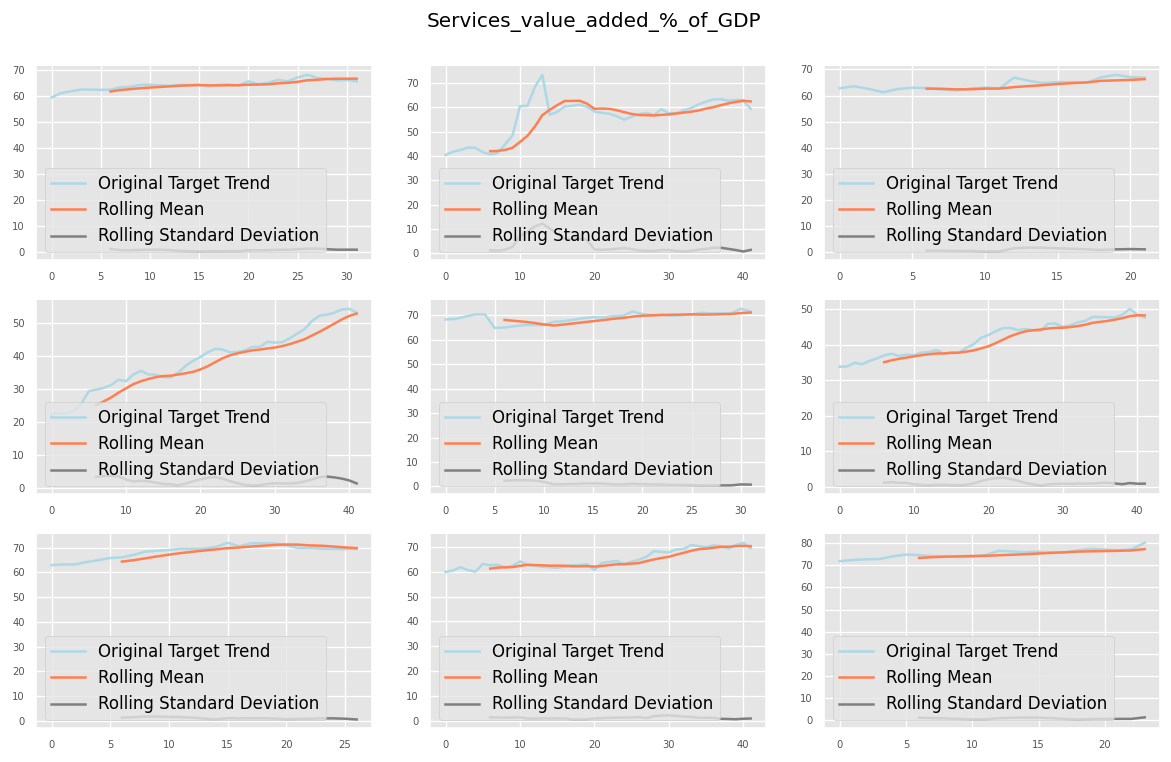

In [11]:
vis_stationary(service_y, "Services_value_added_%_of_GDP")

### ADF test

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Cannot reject Null Hypothesis.")
        print(f" => Series is Non-Stationary.")   
    print("\n")

In [14]:
for con in country:
  adfuller_test(manufacture_y[con],0.05, con)

    Augmented Dickey-Fuller Test on "AUS" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.5292
 No. Lags Chosen       = 0
 Critical value 1%     = -3.661
 Critical value 5%     = -2.961
 Critical value 10%    = -2.619
 => P-Value = 0.8862. Cannot reject Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "BRA" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.516
 No. Lags Chosen       = 2
 Critical value 1%     = -3.61
 Critical value 5%     = -2.939
 Critical value 10%    = -2.608
 => P-Value = 0.5256. Cannot reject Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "CAN" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance

#### First Order Difference

In [15]:
diff_manu = {}
diff_ser = {}
for con in country:
  diff_manu[con] = manufacture_y[con].diff().dropna()
  diff_ser[con] = service_y[con].diff().dropna()

for con in country:
  adfuller_test(diff_manu[con],0.05, con)

    Augmented Dickey-Fuller Test on "AUS" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.3161
 No. Lags Chosen       = 0
 Critical value 1%     = -3.67
 Critical value 5%     = -2.964
 Critical value 10%    = -2.621
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "BRA" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.534
 No. Lags Chosen       = 1
 Critical value 1%     = -3.61
 Critical value 5%     = -2.939
 Critical value 10%    = -2.608
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "CAN" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test 

#### Second order difference 

In [16]:
adfuller_test(diff_manu['CAN'].diff().dropna(),0.05, "CAN")
# second-diff of Canada manufature is stationary

adfuller_test(diff_manu['GBR'].diff().dropna(),0.05, "GBR")
# second-diff of Germany manufature is stationary

adfuller_test(diff_ser['CAN'].diff().dropna(),0.05, "CAN")
# second-diff of Canada service still non-stationary, therefore disgard analysis of Canada in service part

    Augmented Dickey-Fuller Test on "CAN" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.3357
 No. Lags Chosen       = 8
 Critical value 1%     = -4.223
 Critical value 5%     = -3.189
 Critical value 10%    = -2.73
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "GBR" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.6285
 No. Lags Chosen       = 1
 Critical value 1%     = -3.689
 Critical value 5%     = -2.972
 Critical value 10%    = -2.625
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "CAN" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Tes

### Autocorrelation


In [17]:
print("=======Manufaturing Autocorrelation=======")
for con in country:
  autocorrelation_lag1 =  manufacture_y[con]["Manufacturing_value added_%_of_GDP"].autocorr(lag=1)
  print(f"One Year Lag of {con}: ", autocorrelation_lag1)
print("\n")
print("=======Service Autocorrelation=======")
for con in country:
  autocorrelation_lag1 =  service_y[con]["Services_value_added_%_of_GDP"].autocorr(lag=1)
  print(f"One Year Lag of {con}: ", autocorrelation_lag1)

=======Manufaturing Autocorrelation=======
One Year Lag of AUS:  0.9924885267251866
One Year Lag of BRA:  0.9705762022513933
One Year Lag of CAN:  0.9826457423593227
One Year Lag of CHN:  0.9586851566326937
One Year Lag of GBR:  0.9932969057027103
One Year Lag of IND:  0.8220502897041175
One Year Lag of JPN:  0.8470591152229123
One Year Lag of SGP:  0.859512109144477
One Year Lag of USA:  0.983625139802899


=======Service Autocorrelation=======
One Year Lag of AUS:  0.9184916714686304
One Year Lag of BRA:  0.891836143786259
One Year Lag of CAN:  0.8013451362151703
One Year Lag of CHN:  0.9934692226938163
One Year Lag of GBR:  0.8225060920740754
One Year Lag of IND:  0.9871444268079823
One Year Lag of JPN:  0.969898405687662
One Year Lag of SGP:  0.9446066751258873
One Year Lag of USA:  0.8938524099568661


### Model Fitting

#### Train-test split

In [18]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf

In [128]:
def split_train_test(df, valid_num = 5):
    train = df[:-valid_num]
    valid = df[-valid_num:]
    return train, valid

train_manu = {}
valid_manu = {}
train_ser = {}
valid_ser = {}
for con in country:
    train_manu[con], valid_manu[con]= split_train_test(manufacture_y[con])
    train_ser[con], valid_ser[con]= split_train_test(service_y[con])

##### ACF and PACF plot

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsap

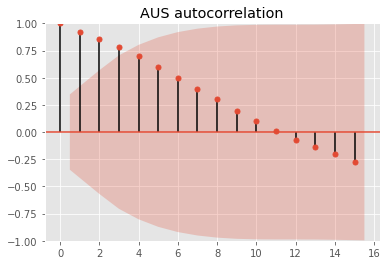

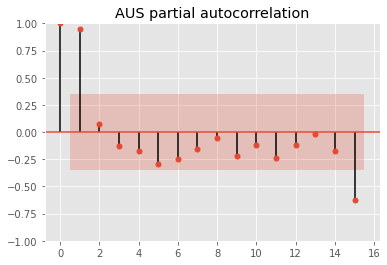

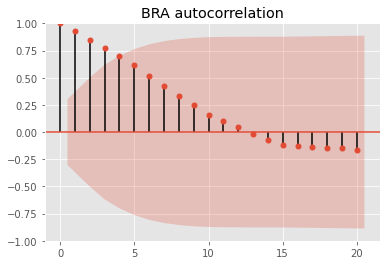

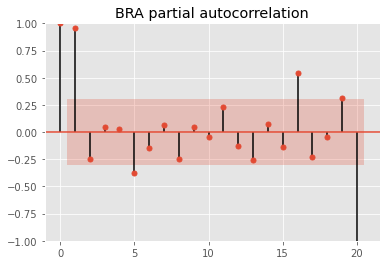

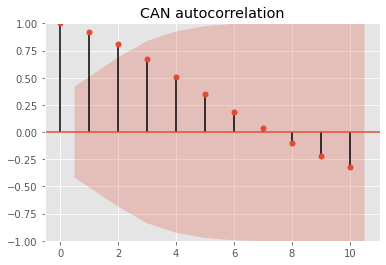

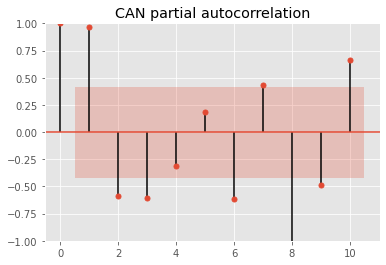

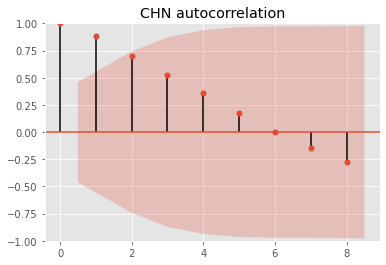

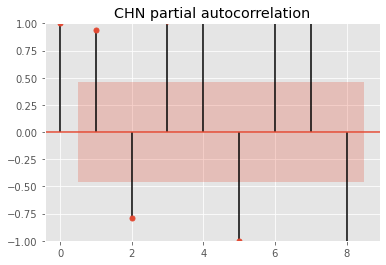

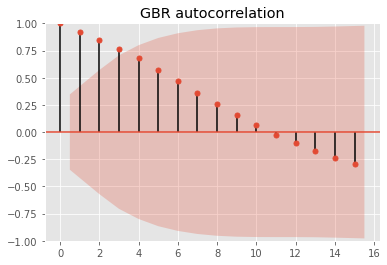

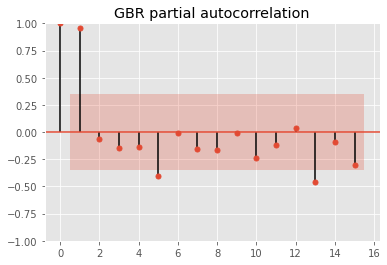

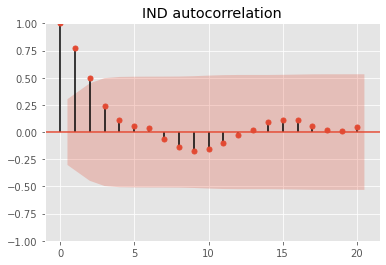

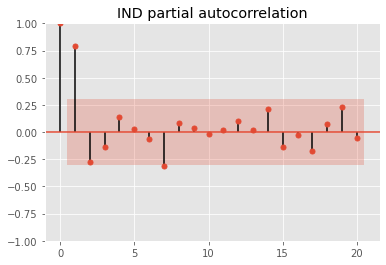

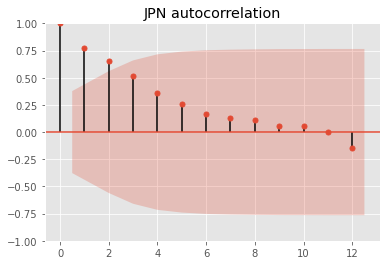

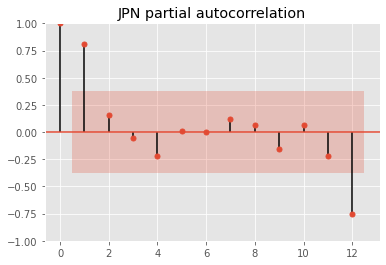

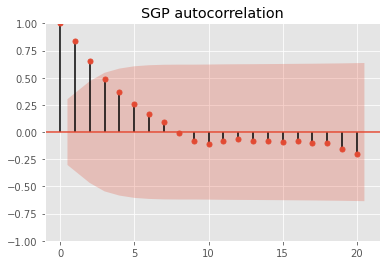

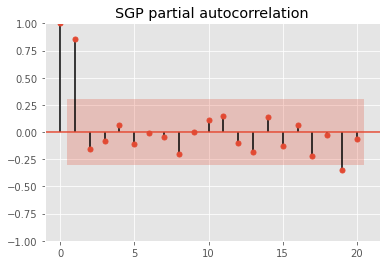

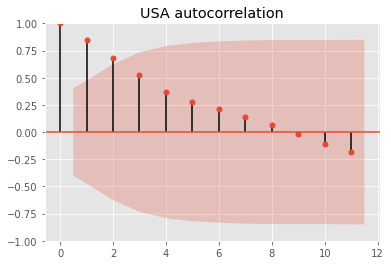

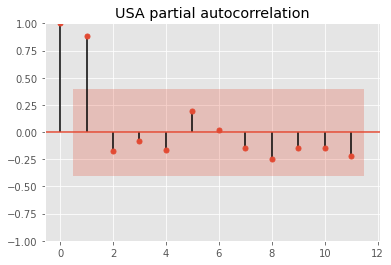

In [129]:
def show_acf_pacf(df, con, val):
    lag = df[con][val].shape[0]//2 - 1
    plot_acf(df[con][val],lags = lag,title = con + " autocorrelation")
    plot_pacf(df[con][val],lags = lag,title = con + " partial autocorrelation")
for con in country:
    show_acf_pacf(manufacture_y, con, "Manufacturing_value added_%_of_GDP")

#### AR,MA, ARMA, ARIMA

Performing univariate time series analysis using auto.arima to determine the best practice model.

In [ ]:
!pip install pmdarima

In [130]:
from pmdarima.arima import auto_arima
manu_model = {}
ser_model = {}
def set_auto_arima(train, con, manu, dic):
  model = auto_arima(train[con][manu],trace=True, error_action='ignore', suppress_warnings=True)
  model.fit(train[con][manu])
  dic[con] = model

  # forecast = model.predict(n_periods=len(test))
  # forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction']) 
print("======= Auto ARIMA for manufacture=======")
for con in country:
  print(f"======={con}=======")
  set_auto_arima(train_manu,con, "Manufacturing_value added_%_of_GDP",manu_model)
  print("\n")

print("======= Auto ARIMA for service=======")
for con in country:
  print(f"======={con}=======")
  set_auto_arima(train_ser,con, "Services_value_added_%_of_GDP",ser_model)
  print("\n")

======= Auto ARIMA for manufacture=======
=======AUS=======
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=23.706, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=25.132, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=24.969, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=35.555, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=26.967, Time=0.13 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.630 seconds


=======BRA=======
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=161.436, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=160.229, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=160.738, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=159.279, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=160.432, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time

#### Forecasting

In [131]:
forecast_manu = {}
interval_manu = {}
forecast_ser = {}
interval_ser = {}
def forecast_arima(model, valid,con, manu,CI):
  forecast = model.predict(n_periods=len(valid_manu[con]),return_conf_int=True,alpha=0.05)[0].reset_index().drop(['index'],axis = 1)
  forecast['Year'] = valid.index
  forecast = forecast.set_index(['Year'])
  forecast = forecast.rename(columns={0: "Prediction"})
  interval =  model.predict(n_periods=len(valid_manu[con]),return_conf_int=True,alpha=0.05)[1]
  manu[con] = forecast
  CI[con] = interval

for con in country:
  forecast_arima(manu_model[con],valid_manu[con],con, forecast_manu, interval_manu)
  forecast_arima(ser_model[con],valid_ser[con],con, forecast_ser,interval_ser)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is availa

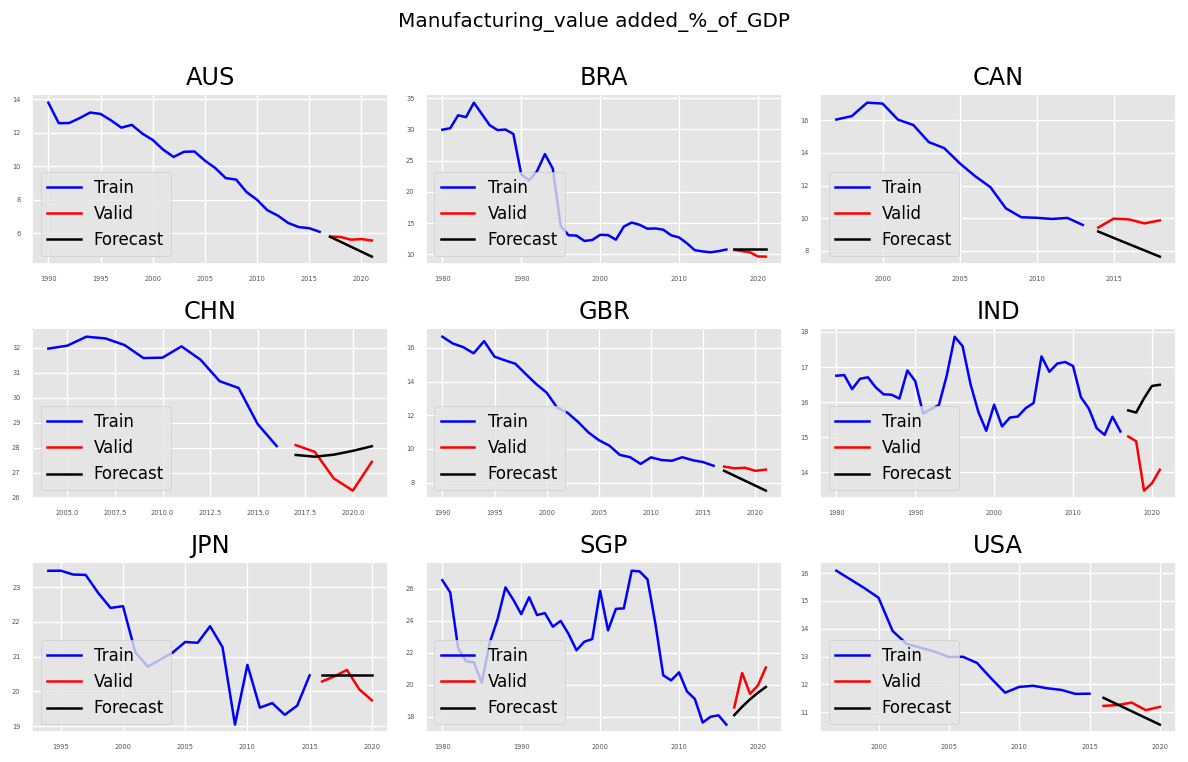

In [132]:
# for manufaturing
fig, axes = plt.subplots(3, 3, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    ax.plot(train_manu[country[i]],color = "blue",label="Train")
    ax.plot(valid_manu[country[i]],color = "red",label="Valid")
    ax.plot(forecast_manu[country[i]],color = "black",label="Forecast")
    # Decorations
    ax.set_title(country[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=4)
    ax.legend(loc="lower left")

plt.suptitle("Manufacturing_value added_%_of_GDP",y=1.05)
plt.tight_layout()
plt.show()

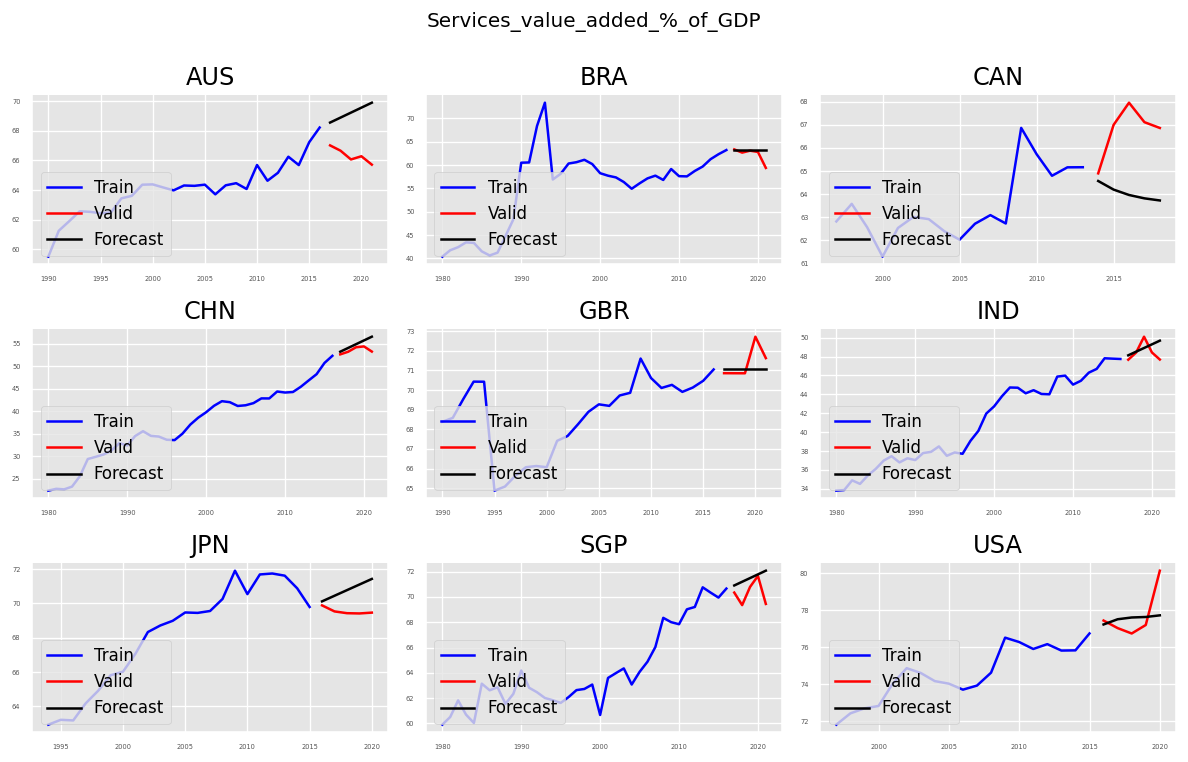

In [133]:
# for service
fig, axes = plt.subplots(3, 3, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    ax.plot(train_ser[country[i]],color = "blue",label="Train")
    ax.plot(valid_ser[country[i]],color = "red",label="Valid")
    ax.plot(forecast_ser[country[i]],color = "black",label="Forecast")
    # Decorations
    ax.set_title(country[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=4)
    ax.legend(loc="lower left")

plt.suptitle("Services_value_added_%_of_GDP",y=1.05)
plt.tight_layout()
plt.show()

### Prediction

In [134]:
forecast_manu_1 = {}
interval_manu_1 = {}
forecast_ser_1 = {}
interval_ser_1 = {}
def forecast_future(model, data,con, manu,CI):
  model = model.fit(data)
  forecast = model.predict(n_periods=5,return_conf_int=True,alpha=0.05)[0].reset_index().drop(['index'],axis = 1)
  forecast['Year'] = [2022,2023,2024,2025,2026]
  forecast = forecast.set_index(['Year'])
  forecast = forecast.rename(columns={0: "Prediction"})
  interval =  model.predict(n_periods=len(valid_manu[con]),return_conf_int=True,alpha=0.05)[1]
  manu[con] = forecast
  CI[con] = interval

for con in country:
  forecast_future(manu_model[con],manufacture_y[con],con, forecast_manu_1, interval_manu_1)
  forecast_future(ser_model[con],service_y[con],con, forecast_ser_1,interval_ser_1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is availa

In [135]:
for i in interval_manu['AUS']:
  print(i)

[5.09626235 6.48181742]
[4.51284505 6.47231583]
[3.9961951  6.39604689]
[3.51410648 6.28521663]
[3.05410444 6.15229978]


In [142]:
def split_CI(data,l,u,con):
  lower = []
  upper = []
  for i in data[con]:
    lower.append(i[0])
    upper.append(i[1])
  l[con] = lower
  u[con] = upper
lower_manu = {}
upper_manu = {}
lower_ser = {}
upper_ser = {}

lower_manu_1 = {}
upper_manu_1 = {}
lower_ser_1 = {}
upper_ser_1 = {}
for con in country:
  split_CI(interval_manu,lower_manu,upper_manu, con)
  split_CI(interval_manu_1,lower_manu_1,upper_manu_1, con)
  split_CI(interval_ser,lower_ser,upper_ser, con)
  split_CI(interval_ser_1,lower_ser_1,upper_ser_1, con)

In [147]:
def log_res(con, raw,valid, train, pred, lower, upper, forecast,lower_1, upper_1,task,y):
  logs = {}
  logs['y_fitted_on_begin_2016'] = pd.DataFrame(
      {'Year': train[con].index,
        'y_value': train[con][y], 
        'y_lower_bound': None,
        'y_upper_bound': None}
  )
  logs['y_pred_on_2017_2021'] = pd.DataFrame(
      {'Year': valid[con].index,
        'y_value':pred[con]['Prediction'], 
        'y_lower_bound': lower[con],
        'y_upper_bound': upper[con]}
  )

  logs['y_fitted_on_begin_2021'] = pd.DataFrame(
      {'Year': raw[con].index,
        'y_value': raw[con][y], 
        'y_lower_bound': None,
        'y_upper_bound': None}
  )
  logs['y_pred_on_2022_2026'] = pd.DataFrame(
      {'Year':[2022,2023,2024,2025,2026],
      'y_value': forecast[con]['Prediction'], 
      'y_lower_bound': lower_1[con],
      'y_upper_bound': upper_1[con]}
  )        
  with pd.ExcelWriter(f"ARIMA/{task}/{con}.xlsx") as writer:  
    for log_type, log in logs.items():
        log.to_excel(writer, sheet_name=log_type, index=False)
for con in country:
  log_res(con, manufacture_y,valid_manu, train_manu, forecast_manu, lower_manu, upper_manu,
          forecast_manu_1,lower_manu_1,upper_manu_1, 'Manufacture', "Manufacturing_value added_%_of_GDP")
  log_res(con, service_y,valid_ser, train_ser, forecast_ser, lower_ser, upper_ser,
          forecast_ser_1,lower_ser_1,upper_ser_1, 'Service', "Services_value_added_%_of_GDP")

In [146]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Evaluation

In [149]:
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [148]:
m_metrics = {}
s_metrics = {}
for con in country:
  mae = mean_absolute_error(valid_manu[con], forecast_manu[con])
  mape = mean_absolute_percentage_error(valid_manu[con],forecast_manu[con])
  rmse = sqrt(mean_squared_error(valid_manu[con],forecast_manu[con]))
  eval = [mae,rmse,mape]
  #print(mae, mse, rmse, con)
  m_metrics[con] = eval

  mae = mean_absolute_error(valid_ser[con], forecast_ser[con])
  mape = mean_absolute_percentage_error(valid_ser[con], forecast_ser[con])
  rmse = sqrt(mean_squared_error(valid_ser[con],forecast_ser[con]))
  eval = [mae,rmse, mape]
  #print(mae, mse, rmse, con)
  s_metrics[con] = eval

In [150]:
m_eval = pd.DataFrame(m_metrics).transpose()
m_eval.columns = ['MAE', 'RMSE','MAPE']

m_eval



,MAE,RMSE,MAPE
AUS,0.485452,0.591209,0.086293
BRA,0.672809,0.806717,0.068163
CAN,1.360725,1.509589,0.138321
CHN,0.752271,0.897889,0.028009
GBR,0.717971,0.798122,0.081627
IND,1.880092,2.086142,0.135094
JPN,0.295330,0.382004,0.014768
SGP,0.922174,1.139728,0.045220
USA,0.307420,0.365328,0.027437


In [151]:
s_eval = pd.DataFrame(s_metrics).transpose()
s_eval.columns = ['MAE', 'RMSE','MAPE']

s_eval

,MAE,RMSE,MAPE
AUS,2.881403,3.021991,0.043524
BRA,1.010412,1.738805,0.016789
CAN,2.710705,2.985956,0.040324
CHN,1.354780,1.691342,0.025292
GBR,0.565637,0.804392,0.007844
IND,0.922334,1.129687,0.019037
JPN,1.228572,1.370898,0.017685
SGP,1.171764,1.492731,0.016810
USA,0.880883,1.187005,0.011196
